In [1]:
!pip install flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

^C
Error in callback <bound method VarWatcher.auto_run_pycodestyle of <pycodestyle_magic.VarWatcher object at 0x000001ADD3A7B908>> (for post_run_cell):


TypeError: auto_run_pycodestyle() missing 1 required positional argument: 'result'

In [ ]:
!pip install autopep8

In [5]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import csv
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"

    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"

    def run(self, images):
        pass


class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"

    def run(self, images):
        pass

In [4]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [5]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


### 6/01/20 : count number of elements in images

In [13]:
path = "C:/Users/ng85ffc/Desktop/"
path1 = "Data/"

In [14]:
fname = path + path1 + "SEATGURU_INFO_AIRCRAFT.csv"
ifile = open(fname, "rt")
 
airline_name = []
aircraft_type = []
category = []
flight_type = []
count = []
total_seat = []
seat_class = []
seat_type = []
seat_position = []

try:
    reader = csv.reader(ifile, delimiter = ";")
    for row in reader:
        airline_name.append(row[1])
        aircraft_type.append(row[2])
        category.append(row[3])
        flight_type.append(row[4])
        count.append(row[5])
        total_seat.append(row[6])
        seat_class.append(row[7])
        seat_type.append(row[8])
        seat_position.append(row[9])
finally:
    ifile.close()

In [15]:
len(airline_name)

10331

In [16]:
my_list = list(set(aircraft_type[2001:3000]))

In [17]:
fname = path + path1 + "Correspondances_images.csv"
file = open(fname, 'wt', newline='')
 

try:
    writer = csv.writer(file, delimiter = ";")
    #écriture de l'entête
    writer.writerow(('Airline_Name', 'Aircraft_Type', 'Images'))
    
    for j in my_list:
        index = []
        for i in range(2001,3000):
            if j == aircraft_type[i] :
                index.append(i)
        #print(index)
        a = (str(min(index)+1) + "-" + str(max(index)+1))
        #print(a)
        writer.writerow((j, index))
        #print(j, min(index), max(index))

finally:
    file.close()
                

In [18]:
for j in my_list:
    #print(j)
    index = []
    for i in range(1,len(aircraft_type)):
        if j == aircraft_type[i]:
            index.append(i)
    #print(index)
    #a = min(index) + "-" + max(index)
    print(j, str(min(index)) + '-' + str(max(index)))

Boeing 787-800 B 2079-2089
Boeing 777-200ER A 2012-6183
Boeing 777-300ER D 2034-2049
Airlines Q400 2372-7173
Boeing 777-200B 2 2793-2806
Airbus A350-1000 2956-2968
767-300ER 2472-2479
Boeing 777 300 2833-2850
Bombardier Q400 2557-10248
Boeing 777-300ER F 2065-2078
Airbus A321-200 12-9864
Airlines Airbus A320neo 2561-7844
Airlines Airbus A321 1500-10155
Boeing 767-300 1753-8099
Bombardier Q200 B 2549-2552
Airbus A320-200 E 2657-2662
Boeing 767-300ER B 2001-2011
A340-542 2454-2461
Airbus A330 200 2917-10065
A321neo 2530-2536
Boeing 747-400 full 2249-2263
A330-200 2537-2544
787-8 2480-2490
Airways Boeing 777-200 B 2992-2998
Embraer 170 B 2881-2883
A320 2446-10188
Airbus A330 300 1703-5263
Boeing 777-200ER B 2024-5558
Airbus A320 236-10134
Airbus A320-200 D 2648-2656
Airbus A319 360-9176
Airbus A319 E 2637-2641
Boeing 747-400 C 2737-6131
Embraer 190 521-6740
Boeing 777-200 2778-7979
A319-111 2491-2498
Airbus A321-200 V2 2190-9872
Airbus A321 E 2685-2691
Airbus A321-200 V1 2180-2189
Airbus 

### 7/01/20 : template machine on exit

In [21]:
path2 = "ProjetInterpromo2020g8/images/"
path3 = "LAYOUT SEATGURU"


#### Separation of plans according to their type

In [22]:
files = [f for f in listdir(path+path1+path3) if isfile(join(path+path1+path3, f))]

In [23]:
type1_file = []
type2_file = []

for i in files:
    if i[len(i)-3:len(i)] == "jpg":
        type1_file.append(i)
    else:
        type2_file.append(i)

##### First type of image with SeatGuru, ex: Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg

In [24]:
#img_rgb = cv2.imread(path + path1 + path3 + "/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg")
img_rgb = cv2.imread(path + path1 + path3 + "/Aeroflot_Russian_Airlines_Sukhoi_Superjet_100-95B_plane13.jpg")
#img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
#greenMask = cv2.inRange(hsv, (26, 10, 30), (97, 100, 255))

In [25]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template1 = cv2.imread(path + path2 + 'Exit17.png',0)
template2 = cv2.imread(path + path2 + 'Exit16.png',0)
w1, h1 = template1.shape[::-1]
w2, h2 = template2.shape[::-1]

In [26]:
#cv2.imshow('plan', img_gray)
#cv2.imshow('template', template)

In [27]:
template = [template1, template2]
w = [w1, w2]
h = [h1, h2]

In [28]:
THRESHOLD : float = 0.9
coordinate_exit = []
for i in range(2):
    res = cv2.matchTemplate(img_gray,template[i],cv2.TM_CCOEFF_NORMED)
    loc = np.where( res >= THRESHOLD)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w[i], pt[1] + h[i]), (0,0,255), 2)
        coordinate_exit.append((pt[0] + w[i], pt[1] + h[i]))

    plt.plot,plt.imshow(img_rgb,cmap = 'gray')
    #plt.figure()
    cv2.imwrite('res' + str(i) + '.png',img_rgb)

In [29]:
coordinate_exit

[(126, 295),
 (114, 518),
 (129, 1085),
 (303, 296),
 (304, 296),
 (303, 297),
 (304, 297),
 (303, 1086),
 (302, 1087),
 (303, 1087)]

#### Display of all images in folder to check consistency

In [38]:
THRESHOLD : float = 0.9

template1 = cv2.imread(path + path2 + 'Exit17.png',0)
template2 = cv2.imread(path + path2 + 'Exit16.png',0)
w1, h1 = template1.shape[::-1]
w2, h2 = template2.shape[::-1]

template = [template1, template2]
w = [w1, w2]
h = [h1, h2]

coordinate = []
for img in type1_file:
    img_rgb = cv2.imread(path + path1 + path3 + "/" + img)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    
    coordinate_exit = []
    for i in range(2):
        res = cv2.matchTemplate(img_gray,template[i],cv2.TM_CCOEFF_NORMED)
        loc = np.where( res >= THRESHOLD)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(img_rgb, pt, (pt[0] + w[i], pt[1] + h[i]), (0,0,255), 2)
            coordinate_exit.append((pt[0] + w[i], pt[1] + h[i]))

        #plt.plot,plt.imshow(img_rgb,cmap = 'gray')
        #plt.figure()
        cv2.imwrite(path + path1 + 'Type1/res' + str(img) + '.png',img_rgb)
    coordinate.append(coordinate_exit)

In [31]:
len(coordinate)

683

##### Second type of image with SeatGuru, ex: Qatar_Airways_Boeing_777-300ER_plane737.svg.png

In [32]:
img_rgb = cv2.imread(path + path1 + path3 + "/Qatar_Airways_Boeing_777-300ER_plane737.svg.png")
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(path + path2 + 'Exit11.png',0)
w, h = template.shape[::-1]

In [33]:
THRESHOLD : float = 0.7
coordinate_exit = []
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= THRESHOLD)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    coordinate_exit.append((pt[0] + w, pt[1] + h))

plt.plot,plt.imshow(img_rgb,cmap = 'gray')
cv2.imwrite('res.png',img_rgb)

True

In [34]:
coordinate_exit

[(173, 190),
 (266, 190),
 (173, 191),
 (266, 191),
 (163, 471),
 (167, 471),
 (274, 471),
 (163, 884),
 (274, 884),
 (163, 1185),
 (167, 1185),
 (274, 1185),
 (274, 1492),
 (163, 1493),
 (274, 1493)]

#### Display of all images in folder to check consistency

In [35]:
THRESHOLD : float = 0.7
coordinate = []

for img in type2_file:
    img_rgb = cv2.imread(path + path1 + path3 + "/Qatar_Airways_Boeing_777-300ER_plane737.svg.png")
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread(path + path2 + 'Exit11.png',0)
    w, h = template.shape[::-1]
    
    coordinate_exit = []
    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    loc = np.where( res >= THRESHOLD)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        coordinate_exit.append((pt[0] + w, pt[1] + h))

    #plt.plot,plt.imshow(img_rgb,cmap = 'gray')
    cv2.imwrite(path + path1 + 'Type2/res' + str(img) + '.png',img_rgb)
    coordinate.append(coordinate_exit)

In [36]:
len(coordinate)

512

Soit deux templates : Exit12 0,7 & Exit15 0,8
// Soit un : Exit11 0,7

### 8/01/20-9/01/19 : Postprocesing

#### Align dots and remove duplicates

In [1]:
# align all coordinates of the pixels
def align(liste):
    # First two lines if the first list is a list of tuples
#     liste_x = [i[0] for i in liste]
#     liste_y = [i[1] for i in liste]
    # Separate x and y if we have a list of numbers like [x1, y1, x2, y2, ...]
    liste_x = [liste[i] for i in range(len(liste)) if i % 2 == 0]
    liste_y = [liste[i] for i in range(len(liste)) if i % 2 == 1]
    
    serie_x = pd.Series(liste_x).value_counts().sort_index()
    serie_y = pd.Series(liste_y).value_counts().sort_index()
    
    px_rare_x = list(serie_x.loc[serie_x <= 3].index)
    px_nb_x = list(serie_x.loc[serie_x > 3].index)
    
    px_rare_y = list(serie_y.loc[serie_y <= 3].index)
    px_nb_y = list(serie_y.loc[serie_y > 3].index)
    
    for i in range(len(liste_x)):
        if liste_x[i] in px_rare_x:
            liste_dist = list(abs(np.array(px_nb_x) - liste_x[i]))
            index = liste_dist.index(min(liste_dist))
            liste_x[i] = px_nb_x[index]
        if liste_y[i] in px_rare_y:
            liste_dist = list(abs(np.array(px_nb_y) - liste_y[i]))
            index = liste_dist.index(min(liste_dist))
            liste_y[i] = px_nb_y[index]
    
    liste_coord = zip(liste_x, liste_y)
    return list(liste_coord)

In [2]:
# Remove all the double detection of one object
def remove_double_detection(liste : list):
    serie = pd.Series(liste).value_counts()
    tuples = serie.loc[serie > 1].index
    for i in tuples:
        liste.remove(i)
    return liste

In [3]:
liste_coord = [146, 517,
133, 537,
146, 537,
185, 537,
198, 537,
211, 537,
224, 537,
263, 537,
276, 537,
133, 557,
146, 557,
185, 557,
198, 557,
211, 557,
224, 557,
263, 557,
276, 557,
133, 577,
146, 577,
185, 577,
198, 577,
211, 577,
224, 577,
263, 577,
276, 577,
133, 597,
146, 597,
185, 597,
198, 597,
211, 597,
224, 597,
263, 597,
276, 597,
133, 617,
146, 617,
185, 617,
198, 617,
211, 617,
224, 617,
263, 617,
276, 617,
133, 637,
146, 637,
185, 637,
198, 637,
211, 637,
224, 637,
263, 637,
276, 637,
133, 657,
146, 657,
185, 657,
198, 657,
211, 657,
224, 657,
263, 657,
276, 657,
133, 677,
146, 677,
185, 677,
198, 677,
211, 677,
224, 677,
263, 677,
276, 677,
133, 697,
146, 697,
185, 697,
198, 697,
211, 697,
224, 697,
263, 697,
276, 697,
133, 717,
146, 717,
185, 717,
198, 717,
211, 717,
224, 717,
263, 717,
276, 717,
133, 737,
146, 737,
185, 737,
198, 737,
211, 737,
224, 737,
263, 737,
276, 737,
133, 757,
146, 757,
185, 757,
198, 757,
211, 757,
224, 757,
263, 757,
276, 757,
133, 777,
146, 777,
185, 777,
198, 777,
211, 777,
224, 777,
263, 777,
276, 777,
133, 797,
146, 797,
185, 797,
198, 797,
211, 797,
224, 797,
263, 797,
276, 797,
133, 817,
146, 817,
185, 817,
198, 817,
211, 817,
224, 817,
263, 817,
276, 817,
133, 837,
146, 837,
185, 837,
198, 837,
211, 837,
224, 837,
263, 837,
276, 837,
133, 857,
146, 857,
263, 857,
276, 857,
133, 971,
146, 971,
185, 971,
198, 971,
211, 971,
224, 971,
263, 971,
276, 971,
133, 991,
146, 991,
185, 991,
198, 991,
211, 991,
224, 991,
263, 991,
276, 991,
133, 1011,
146, 1011,
185, 1011,
198, 1011,
211, 1011,
224, 1011,
263, 1011,
276, 1011,
133, 1031,
146, 1031,
185, 1031,
198, 1031,
211, 1031,
224, 1031,
263, 1031,
276, 1031,
133, 1051,
146, 1051,
185, 1051,
198, 1051,
211, 1051,
224, 1051,
263, 1051,
276, 1051,
133, 1071,
146, 1071,
185, 1071,
198, 1071,
211, 1071,
224, 1071,
263, 1071,
276, 1071,
133, 1091,
146, 1091,
185, 1091,
198, 1091,
211, 1091,
224, 1091,
263, 1091,
276, 1091,
133, 1111,
146, 1111,
185, 1111,
198, 1111,
211, 1111,
224, 1111,
263, 1111,
276, 1111,
133, 1131,
146, 1131,
185, 1131,
198, 1131,
211, 1131,
224, 1131,
263, 1131,
276, 1131,
135, 1151,
148, 1151,
261, 1151,
274, 1151,
137, 1171,
150, 1171,
191, 1171,
204, 1171,
217, 1171,
259, 1171,
272, 1171,
139, 1191,
152, 1191,
191, 1191,
204, 1191,
217, 1191]

In [6]:
l_test = align(liste_coord)

In [8]:
x = [a for a,b in l_test]
y = [b for a,b in l_test]

In [9]:
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.cluster import KMeans
import numpy as np

In [10]:
plan = open(path + path1 + "coord-Aer_Lingus_Airbus_A330-200_plane4-NormalSeats.txt", "r")
data = plan.read()

NameError: name 'path' is not defined

In [ ]:
list1 = []
list2 = []
data_array = data.replace('\n', ',').replace(' ','').split(',')

for i in range(0,len(data_array)-1,2):
    list1.append(int(data_array[i]))
    list2.append(int(data_array[i+1]))
    

In [45]:
liste = np.array(list(zip(list1,list2)))

In [46]:
liste

array([[ 146,  517],
       [ 133,  537],
       [ 146,  537],
       [ 185,  537],
       [ 198,  537],
       [ 211,  537],
       [ 224,  537],
       [ 263,  537],
       [ 276,  537],
       [ 133,  557],
       [ 146,  557],
       [ 185,  557],
       [ 198,  557],
       [ 211,  557],
       [ 224,  557],
       [ 263,  557],
       [ 276,  557],
       [ 133,  577],
       [ 146,  577],
       [ 185,  577],
       [ 198,  577],
       [ 211,  577],
       [ 224,  577],
       [ 263,  577],
       [ 276,  577],
       [ 133,  597],
       [ 146,  597],
       [ 185,  597],
       [ 198,  597],
       [ 211,  597],
       [ 224,  597],
       [ 263,  597],
       [ 276,  597],
       [ 133,  617],
       [ 146,  617],
       [ 185,  617],
       [ 198,  617],
       [ 211,  617],
       [ 224,  617],
       [ 263,  617],
       [ 276,  617],
       [ 133,  637],
       [ 146,  637],
       [ 185,  637],
       [ 198,  637],
       [ 211,  637],
       [ 224,  637],
       [ 263,

#### Kmeans

In [13]:
random_grid = {'max_iter': [100, 150, 200, 250, 300, 350, 400],
               'n_clusters': [2,3,4,5,6,7,8,9,10,11, 12, 13, 14, 15],
               'init': ['k-means++', 'random'],
               'precompute_distances': ['auto', True, False],
               'algorithm' : ['auto', 'full', 'elkan']}

In [14]:
km = KMeans()

In [15]:
km_random = RandomizedSearchCV(estimator = km, param_distributions = random_grid, n_iter = 10, verbose=2, random_state=42, n_jobs = -1)
km_random.fit(l_test)     
print(km_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.4s finished


{'precompute_distances': True, 'n_clusters': 13, 'max_iter': 200, 'init': 'k-means++', 'algorithm': 'elkan'}


In [17]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(precompute_distances = False, n_clusters = 6, max_iter = 350, init = 'random', algorithm = 'full').fit(l_test)
kmeans.labels_

kmeans.cluster_centers_

array([[  203.07317073,   576.02439024],
       [  208.14634146,   679.43902439],
       [  204.5       ,  1021.        ],
       [  157.44      ,   785.8       ],
       [  200.275     ,  1135.5       ],
       [  244.        ,   799.30769231]])

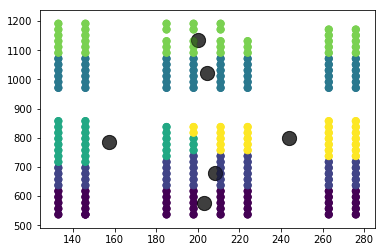

In [20]:
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(l_test)
plt.scatter(x, y, c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

#### KNN

In [53]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
knn = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(liste)
distances, indices = knn.kneighbors(liste)

In [54]:
knn

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=6, p=2, radius=1.0)

In [55]:
y_knn = knn.predict(liste)
plt.scatter(liste[:, 0], liste[:, 1], c=y_knn, s=50)

centers = knn.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

In [124]:
random_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11, 12, 13, 14, 15],
               'weights': ['uniform', 'distance'],
               'metric' : ['euclidean', 'minkowski'],
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

1:33: E231 missing whitespace after ','
1:35: E231 missing whitespace after ','
1:37: E231 missing whitespace after ','
1:39: E231 missing whitespace after ','
1:41: E231 missing whitespace after ','
1:43: E231 missing whitespace after ','
1:45: E231 missing whitespace after ','
1:47: E231 missing whitespace after ','
1:50: E231 missing whitespace after ','


ValueError: too many values to unpack (expected 3)

1:33: E231 missing whitespace after ','
1:35: E231 missing whitespace after ','
1:37: E231 missing whitespace after ','
1:39: E231 missing whitespace after ','
1:41: E231 missing whitespace after ','
1:43: E231 missing whitespace after ','
1:45: E231 missing whitespace after ','
1:47: E231 missing whitespace after ','
1:50: E231 missing whitespace after ','


ValueError: too many values to unpack (expected 3)

### CAH

In [22]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

In [23]:
# generate link matrix
Z = linkage(l_test,method='ward',metric='euclidean')

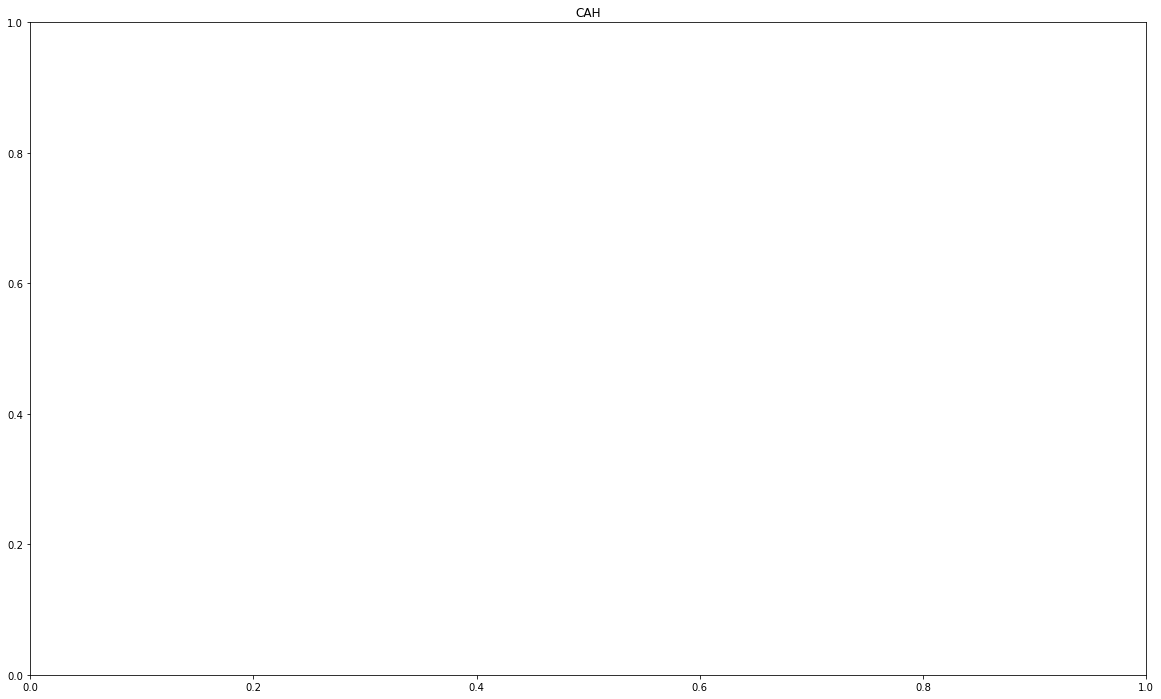

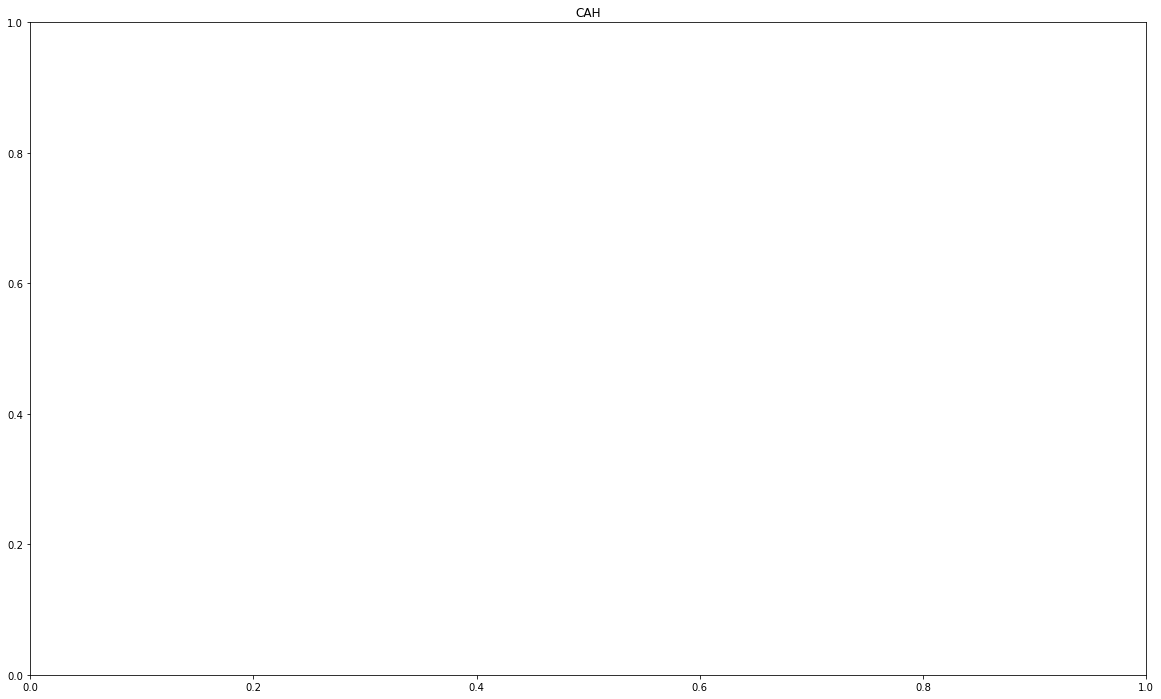

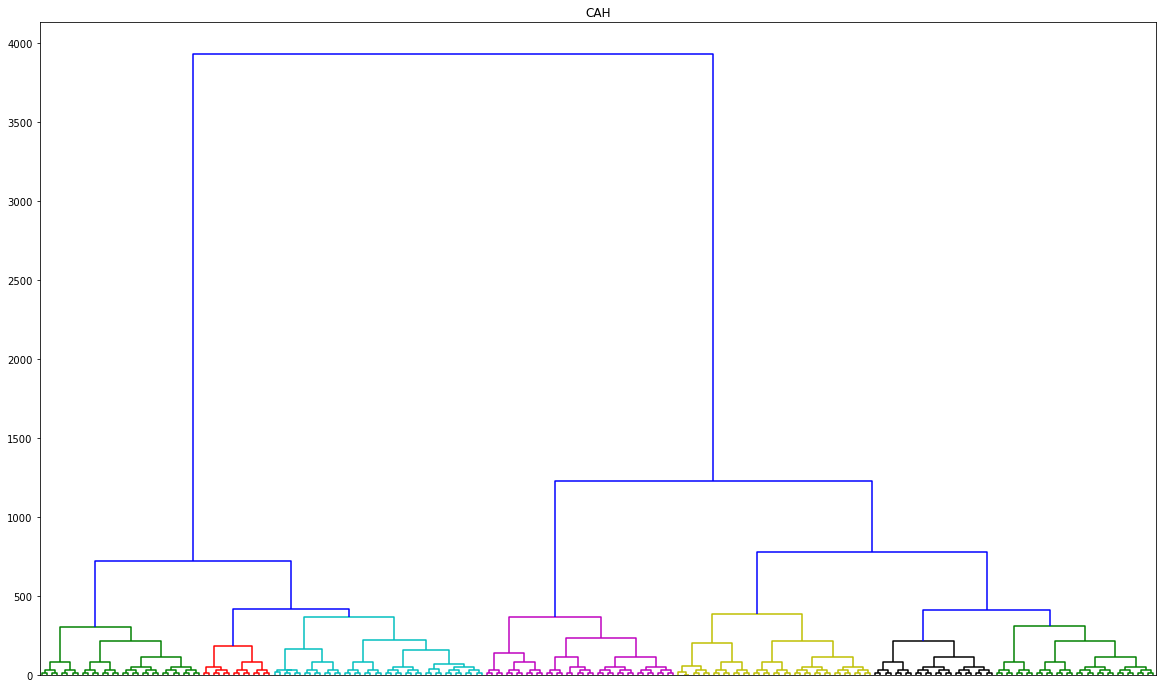

7 groupes constitués
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3]


In [26]:
# génération et affichage du dendrogramme
plt.figure(figsize=(20,12))
plt.title("CAH")
dendrogram(Z,labels=l_test,no_labels=True,color_threshold=400)
plt.show()
groupes_cah = sch.fcluster(Z,t=400,criterion='distance')
print(np.unique(groupes_cah).size, "groupes constitués")
groupe = list(groupes_cah)
print(groupe)

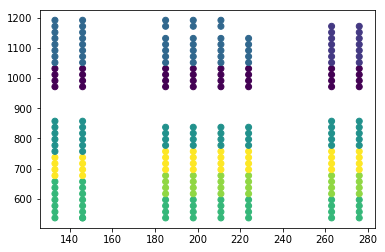

In [28]:
plt.scatter(x,y,c=groupes_cah)
plt.show()

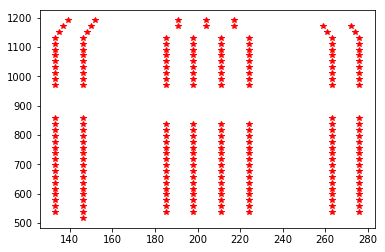

In [80]:
######
plt.plot(list1,list2,'*',color='red')
plt.show()

In [ ]:
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=X,orientation='left',color_threshold=0)
plt.show()
#découpage à la h=3auteur t = 7 ==> identifiants de 4 groupes obtenus
groupes_cah = sch.fcluster(Z,t=100,criterion='distance')
print(groupes_cah)
######
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
print(idg)
#affichage des observations et leurs groupes
cah = pd.DataFrame(X,groupes_cah[idg])
print(groupes_cah[idg])
ind = list(cah.index)
###


In [81]:
groupes_cah = sch.fcluster(Z,t=400,criterion='distance')
groupes_cah

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 5 5 5 5 5 5 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 6 6 6 6 6 7
 7 6 6 6 6 6 6 7 7 6 6 6 6 6 6 4 4 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 2 2 3 3 3 3 3 3 2 2 3 3 3 3
 3 3 2 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3 2 2 3 3 2 2 3 3 3 3 3 2 2 3 3 3 3 3]
